In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np

class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # Do your print / debug stuff here
        print(x.shape)
        return x

class ConvAE_DCEC(nn.Module):
    def __init__(self, in_channels=3, embedded_dim=10):
        super(ConvAE_DCEC, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 32, kernel_size=5, padding=2, stride=2), # [16, 16, 32]
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=5, padding=2, stride=2), # [8,8,64]
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, padding=0, stride=2), # [3,3,128]
            nn.ReLU(),
            nn.Flatten(start_dim=1),
            nn.Linear(128 * 3 * 3, embedded_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(embedded_dim, 128 * 3 * 3),
            nn.ReLU(),
            nn.Unflatten(1, (128,3,3)),
            nn.ConvTranspose2d(128, 64, kernel_size=4, padding=0, stride=2), # [8,8,64]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=4, padding=1, stride=2), # [16, 16, 32]
            nn.ReLU(),
            nn.ConvTranspose2d(32, in_channels, kernel_size=4, padding=1, stride=2), # [32, 32, 3]
            nn.Tanh() # map to input image scale [-1,1]
        )


    def forward(self, x):
        latent = self.encoder(x)
        return self.decoder(latent)
    
def to_img(x):
    # normalize tensor to [0,1] from [-1,1] for plotting
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x



In [2]:
DATASET_CACHE_DIR = './data'
BATCH_SIZE = 128
#settings from paper
LR = 0.001
N_EPOCHS = 200
USE_GPU = torch.cuda.is_available()

In [33]:
transforms_val = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])
transforms_train = T.Compose([
    # T.RandomHorizontalFlip(),
    # T.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])


train_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=True, download=True, transform=transforms_train), batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=4)
test_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=False, download=True, transform=transforms_val), batch_size=BATCH_SIZE, shuffle=False, drop_last=False, num_workers=4)

batch = next(iter(train_loader))
print(torch.max(batch[0]))
print(torch.min(batch[0]))


Files already downloaded and verified
Files already downloaded and verified
tensor(1.)
tensor(-1.)


Training loss: 0.24889448881149293


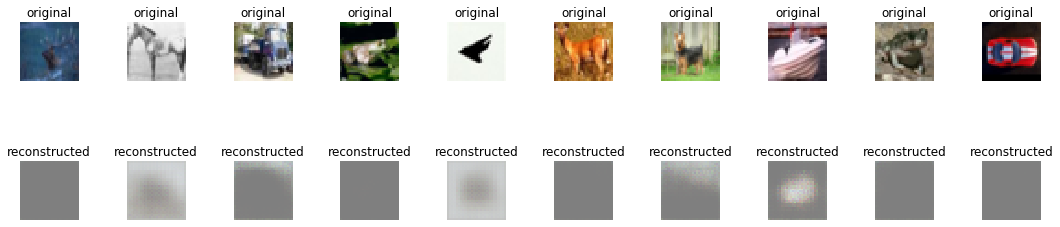

Training loss: 0.1926094420827352
Training loss: 0.1886528642513813
Training loss: 0.18704722844637356
Training loss: 0.18581427458005073
Training loss: 0.18477849624095818
Training loss: 0.1840541300483239
Training loss: 0.18358310426657015
Training loss: 0.18315614488644477
Training loss: 0.18288334260384242


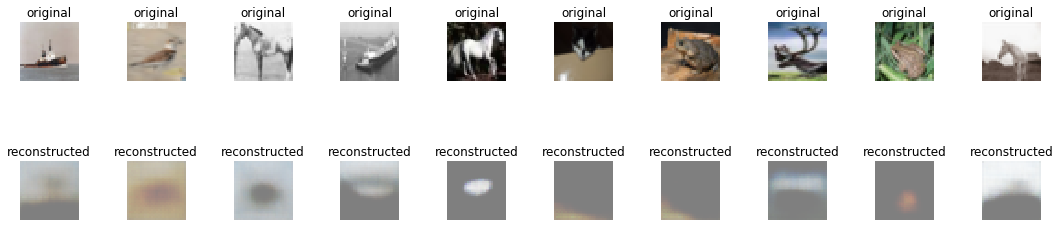

Training loss: 0.1826036336712348
Training loss: 0.1823172335059215
Training loss: 0.18210970346744243
Training loss: 0.18193697386827223
Training loss: 0.1817603539197873
Training loss: 0.18165033539900413
Training loss: 0.18142657448083926
Training loss: 0.18132206789958172
Training loss: 0.18119918012466185
Training loss: 0.1810768790352039


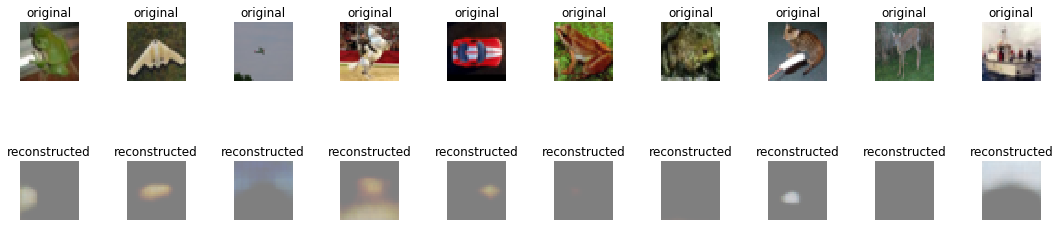

Training loss: 0.18094558517138162
Training loss: 0.18083280672629673
Training loss: 0.18074853252141904
Training loss: 0.18064252650126433
Training loss: 0.18052229392222868
Training loss: 0.18040304413208594
Training loss: 0.18035102459864738
Training loss: 0.18024819325178099
Training loss: 0.18014508890799988
Training loss: 0.18007439573605855


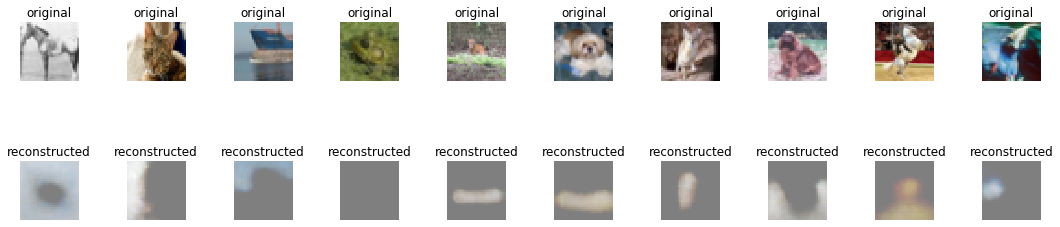

Training loss: 0.18003387791224015
Training loss: 0.17996939527682768
Training loss: 0.17982746427639937
Training loss: 0.1797521201081765
Training loss: 0.17977118220848914
Training loss: 0.17962611810519144
Training loss: 0.17958935159139144
Training loss: 0.17951239718076512
Training loss: 0.17943082726918735
Training loss: 0.17935984925581858


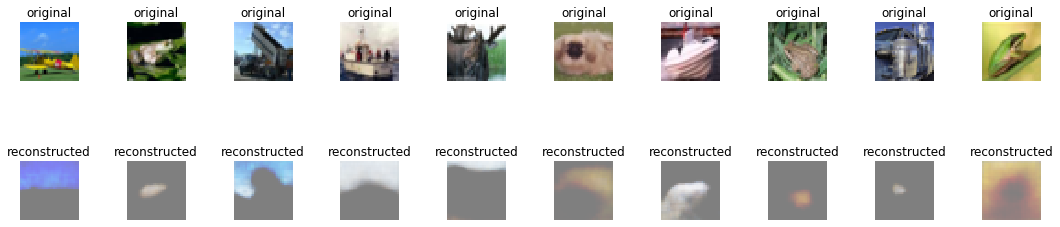

Training loss: 0.17932810951501896
Training loss: 0.1792830589490059
Training loss: 0.17922056244734005
Training loss: 0.17916848395879453
Training loss: 0.17913912553817798
Training loss: 0.17902954117609904
Training loss: 0.17897349916971647
Training loss: 0.17899192762680544
Training loss: 0.1789016251762708
Training loss: 0.17884595352105606


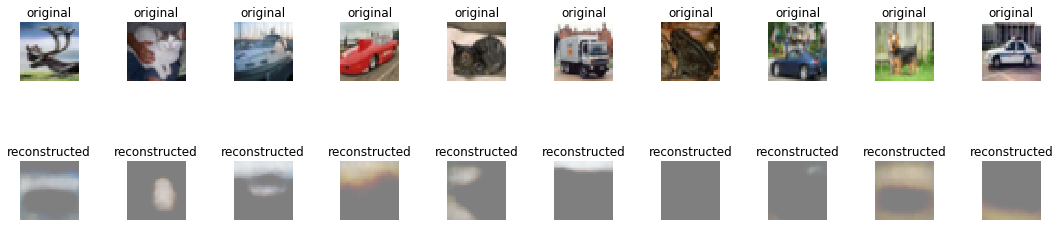

Training loss: 0.17881645739842683
Training loss: 0.1787538244938239
Training loss: 0.1787247019700515
Training loss: 0.17870985281008941
Training loss: 0.17865689190534445
Training loss: 0.1786146022188358
Training loss: 0.17853603061193074
Training loss: 0.17851869693169228
Training loss: 0.17848119281041316
Training loss: 0.17844475851609157


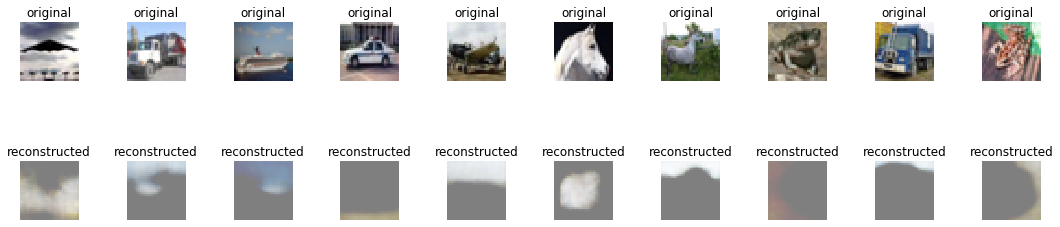

Training loss: 0.17843478715572603
Training loss: 0.1783855975056306
Training loss: 0.17832433871733835
Training loss: 0.17836609880129498
Training loss: 0.17825692276924085
Training loss: 0.17820604084393918
Training loss: 0.1781853295289553
Training loss: 0.17819850181157773
Training loss: 0.17815082367414084
Training loss: 0.17809238796814894


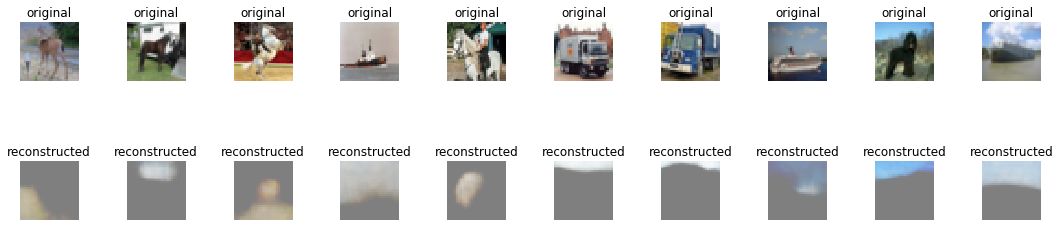

Training loss: 0.17811354582126324
Training loss: 0.17805948028197655
Training loss: 0.17804526335153825
Training loss: 0.17798138704055394
Training loss: 0.17796229609312156
Training loss: 0.17796888863429045
Training loss: 0.17790027272242767
Training loss: 0.17794462484426987
Training loss: 0.17787674012092444
Training loss: 0.17781686775195293


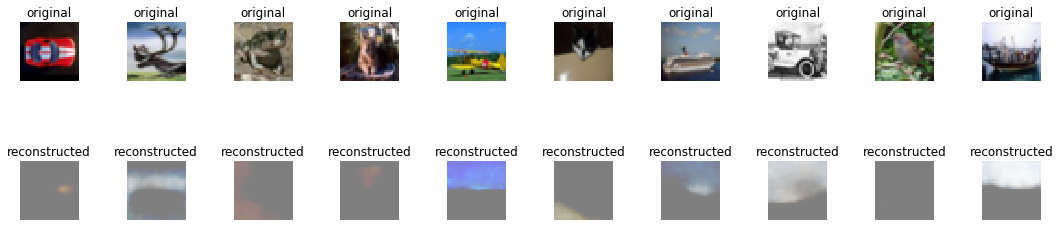

Training loss: 0.17784635428434764
Training loss: 0.1777603484499149
Training loss: 0.17769830784736534
Training loss: 0.17768832533023296
Training loss: 0.1777029276276246
Training loss: 0.17763575731943815
Training loss: 0.17765210698812436
Training loss: 0.17758486381708047
Training loss: 0.17760605865564102
Training loss: 0.1775897713043751


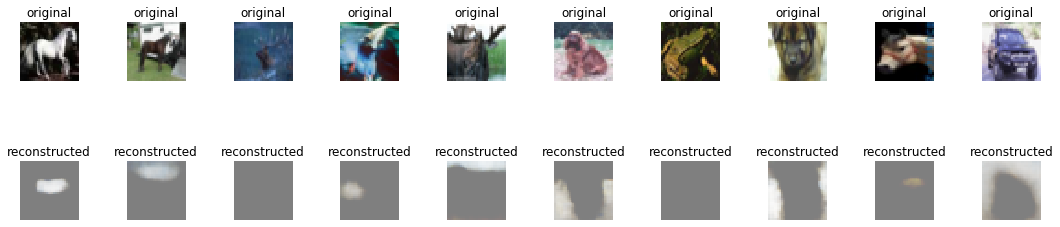

Training loss: 0.17753461660482944
Training loss: 0.17755336994544055
Training loss: 0.17749824829590627
Training loss: 0.1774959908846097
Training loss: 0.17747233158502823
Training loss: 0.17742802985967734
Training loss: 0.17740210313827565
Training loss: 0.1774311472972234
Training loss: 0.17739234830324466
Training loss: 0.1773572122821441


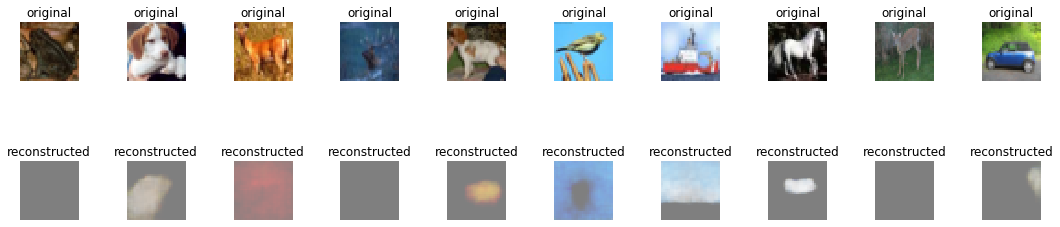

Training loss: 0.17734039353254513
Training loss: 0.17733253989464198
Training loss: 0.17730523206484625
Training loss: 0.17726753969223072
Training loss: 0.1772647098853038
Training loss: 0.1772239089012146
Training loss: 0.17722188723392976
Training loss: 0.17717137260314747
Training loss: 0.17720295397134928
Training loss: 0.1772074901522734


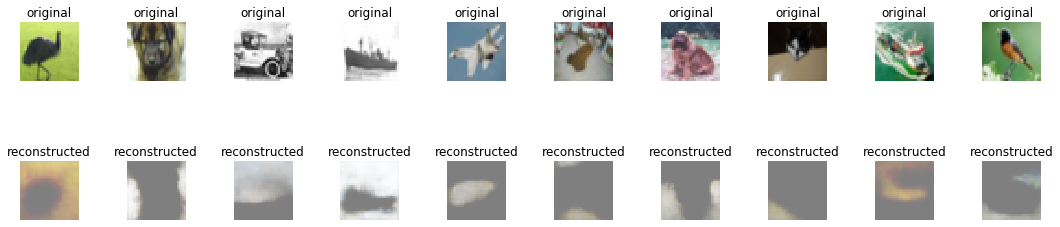

Training loss: 0.17712608239589595
Training loss: 0.17715266580000902
Training loss: 0.17713743891471473
Training loss: 0.17703419480568322
Training loss: 0.17706399044165244
Training loss: 0.17702909998404673
Training loss: 0.17701259358571125
Training loss: 0.17705375800530115
Training loss: 0.17701437943256818
Training loss: 0.17698349093015378


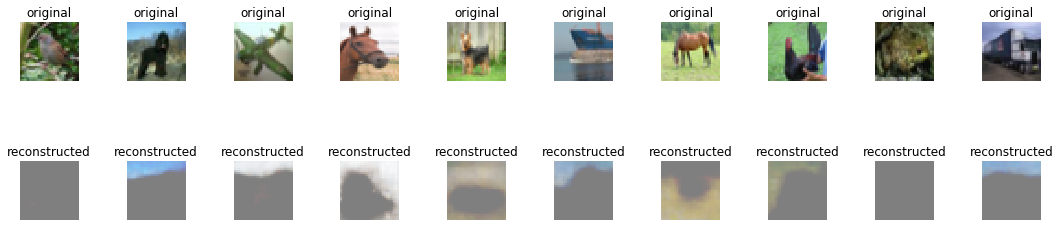

Training loss: 0.17693631794208137
Training loss: 0.1769178563203567
Training loss: 0.17694904991449453
Training loss: 0.17692948625637936
Training loss: 0.1768837869167328
Training loss: 0.17685056519814027
Training loss: 0.17693656518673284
Training loss: 0.17693655976118186
Training loss: 0.17687173993923724
Training loss: 0.17678170609168517


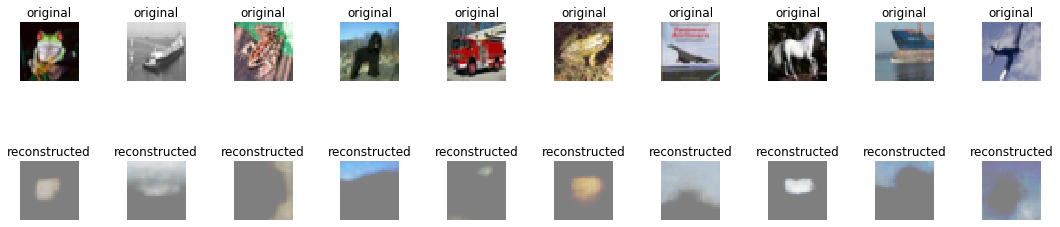

Training loss: 0.17674624644792997
Training loss: 0.1767913084381666
Training loss: 0.1768158067877476
Training loss: 0.17679978043605118
Training loss: 0.17675898109491056
Training loss: 0.17677101760338515
Training loss: 0.17673543301912453
Training loss: 0.1767206493096474
Training loss: 0.17669796026670015
Training loss: 0.17672894570307854


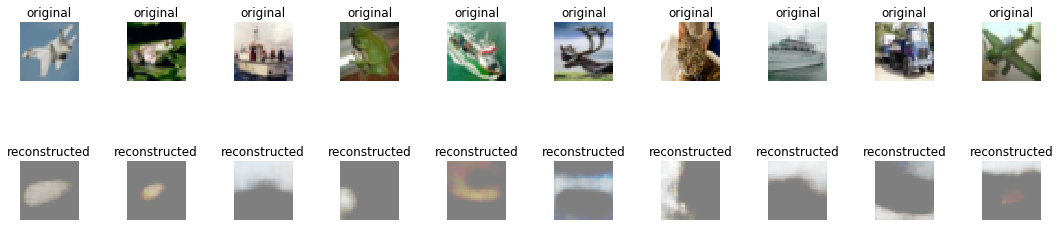

Training loss: 0.17667666922012965
Training loss: 0.17665369525933877
Training loss: 0.17662654771254613
Training loss: 0.17665900515440183
Training loss: 0.17660229018865486
Training loss: 0.17659497406238164
Training loss: 0.1766153342448748
Training loss: 0.1765415369700163
Training loss: 0.1765999137973174
Training loss: 0.17656820359138342


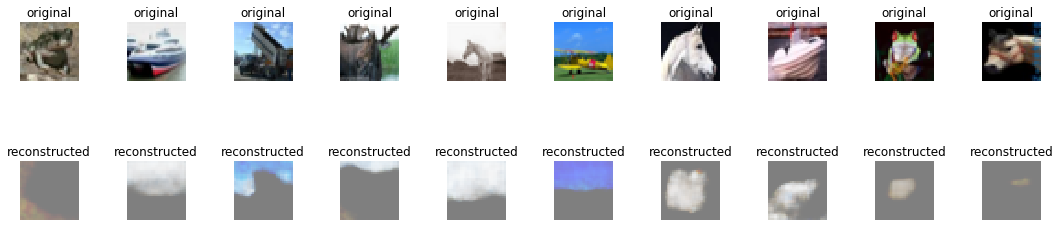

Training loss: 0.17659348822557008
Training loss: 0.17653925644281582
Training loss: 0.1765503486379599
Training loss: 0.1765238209030567
Training loss: 0.17654119783487077
Training loss: 0.17650891217665796
Training loss: 0.17647663190578802
Training loss: 0.17644896755615871
Training loss: 0.17645288361952854
Training loss: 0.1764493269798083


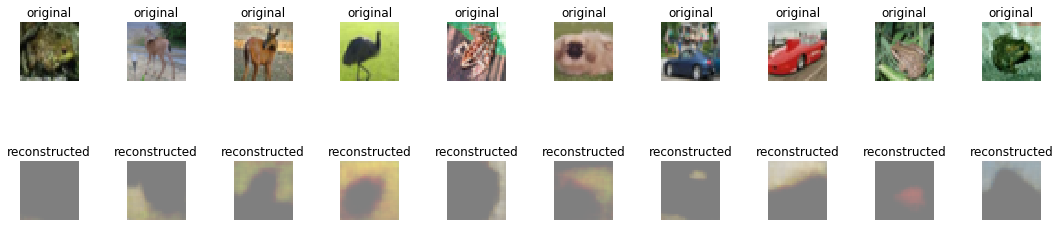

Training loss: 0.17643130734944956
Training loss: 0.1763935121970299
Training loss: 0.17638161174761943
Training loss: 0.17644324134557676
Training loss: 0.17641170086004795
Training loss: 0.17638568412034938
Training loss: 0.1763327643657342
Training loss: 0.17628126713709955
Training loss: 0.17636891351296352
Training loss: 0.17634110557727325


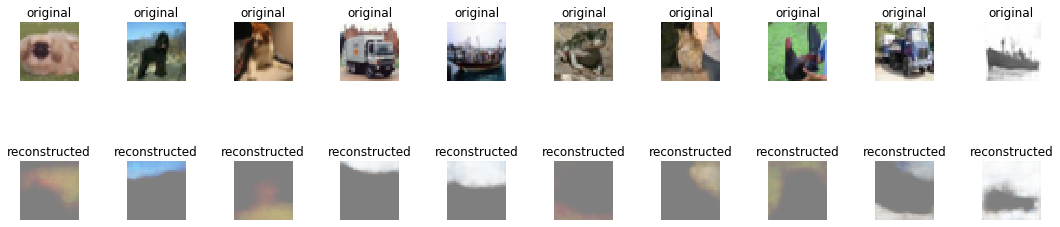

Training loss: 0.1763309304148723
Training loss: 0.176283132762481
Training loss: 0.17629300310061527
Training loss: 0.17629644454289706
Training loss: 0.1762859319265072
Training loss: 0.17622603747325066
Training loss: 0.17630250461590596
Training loss: 0.1761890885157463
Training loss: 0.1762408178204145
Training loss: 0.17619927047919004


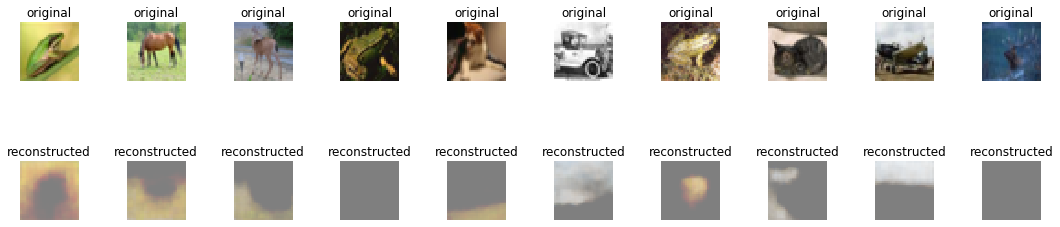

Training loss: 0.17623603481512803
Training loss: 0.1762704672721716
Training loss: 0.17620020902309663
Training loss: 0.17617364728297943
Training loss: 0.17616594074628292
Training loss: 0.1761411727238924
Training loss: 0.1761610384934988
Training loss: 0.17616098817342368
Training loss: 0.1761014746931883
Training loss: 0.17612081063099397


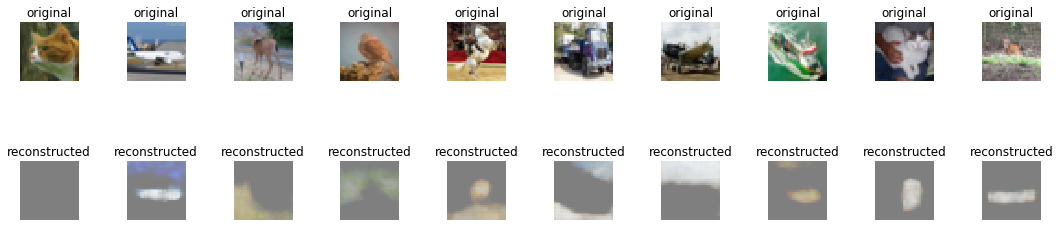

Training loss: 0.17615479085689936
Training loss: 0.17609140861492892
Training loss: 0.1760968179656909
Training loss: 0.1760981845550048
Training loss: 0.17610603815469986
Training loss: 0.17604310921369454
Training loss: 0.17604597440132727
Training loss: 0.1760628314736562
Training loss: 0.17603418028507478
Training loss: 0.17606343317490358


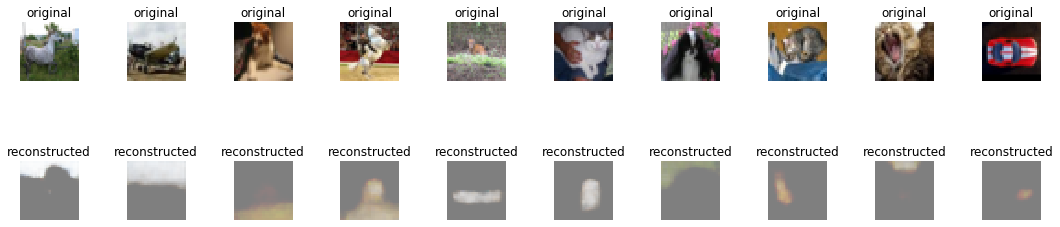

In [4]:
autoencoder = ConvAE_DCEC()

optimizer =  torch.optim.Adam(autoencoder.parameters(), lr=LR)

criterion =  nn.MSELoss() 

if USE_GPU:
    autoencoder.cuda()
    criterion.cuda()

for epoch in range(N_EPOCHS):
    autoencoder.train()
    losses = []
    for (X, _) in train_loader:
        if USE_GPU:
            X = X.cuda()
        
        optimizer.zero_grad()
        
    
        reconstruction = autoencoder(X)
        
        loss = criterion(X, reconstruction)
        
        loss.backward()

        losses = np.append(losses, loss.item())

        optimizer.step()

    autoencoder.eval()

    # print loss of train set
    print('Training loss: {}'.format(np.mean(losses)))

    # evaluation on test set 
    if ((epoch+1) % 10) == 0 or epoch == 0:
        X_test, _ = next(iter(test_loader))
        if USE_GPU:
            X_test = X_test.cuda()

        with torch.no_grad():
            reconstruction_test = autoencoder(X_test)

        loss = criterion(X_test, reconstruction_test)
        print('Test loss: {}'.format(loss), file=open('/dev/stdout', 'w')) # print to terminal for monitoring on gpu server

        # normalize to [0,1] for plotting
        X_test = to_img(X_test)
        reconstruction_test = to_img(reconstruction_test)
    
        # show some random images as well as some fixed images to may better see the progress
        fig, ax = plt.subplots(2, 10)
        fig.set_figwidth(15)
        fig.tight_layout()
        ax = ax.flatten()
        for i, index in enumerate(random.sample(range(len(X_test)),10)):
            img = X_test[index].cpu().numpy() # show noisy input for denoising autoencoder
            img_rec = reconstruction_test[index].cpu().numpy()
            ax[i].imshow(img.transpose(1,2,0))
            ax[i+10].imshow(img_rec.transpose(1,2,0))
            ax[i].set_title(f'original')
            ax[i+10].set_title(f'reconstructed')
            ax[i].set_axis_off()
            ax[i+10].set_axis_off()
        plt.show()

torch.save(autoencoder.state_dict(), "./convAE_DCED.pth")